[View in Colaboratory](https://colab.research.google.com/github/jy617lee/TWL/blob/master/%EC%9D%B4%EC%A7%80%EC%9C%A4_%EB%B2%94%EC%A3%84%ED%86%B5%EA%B3%84_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%83%90%EC%83%89%ED%95%98%EA%B8%B0.ipynb)

## 데이터 읽어오기

웹에 공개되어 있는 범죄 통계 데이터 파일을 가져와서 파이썬 리스트(list)로 변환한 후 `data`라는 이름의 변수에 담아 둡니다.

In [8]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
font_name = font.get_name()
plt.rcParams['font.family'] = font_name

!pip install -q 'plotnine[all]'
from plotnine import *
import plotnine
plotnine.options.figure_size = (3.6, 4.0)

data = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/messy/crime_clean.csv')



NanumBarunGothic


## 연도별 범죄 추이 

범죄 발생 횟수는 2012년-2014년까지는 감소 추세였으나 이후 다시 증가추세를 보인다. (2014년에 대체 무슨일이...?)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


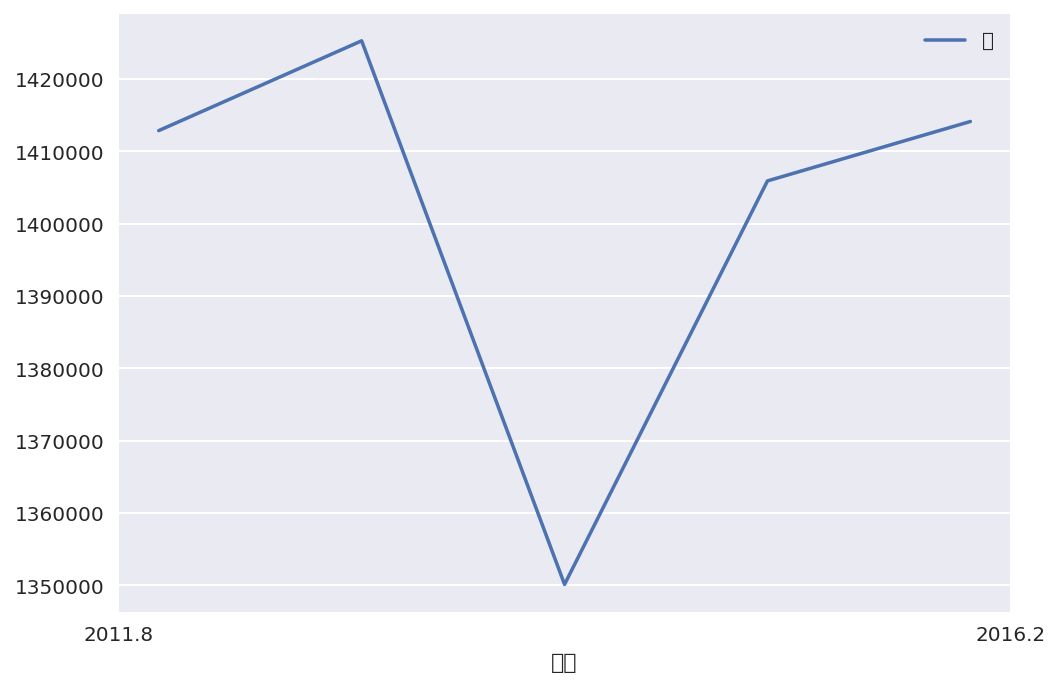

In [10]:
import matplotlib.dates as mdates
df = pd.DataFrame(data, columns=['대분류','소분류','연도','젠더','연령대','유형','명'])

df.set_index(df['연도'])

ax = df.groupby(df['연도']).sum().plot(kind='line')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
yearmin = pd.to_datetime(df['연도'].min(), format='%Y')
yearmax = pd.to_datetime(df['연도'].max(), format='%Y')
plt.show()


#### 성별 범죄 발생횟수 추이
 - 성별 범죄 발생횟수는 남성 --> 여성 --> 불상 순으로 자주 발생하는 것을 볼 수 있습니다. 

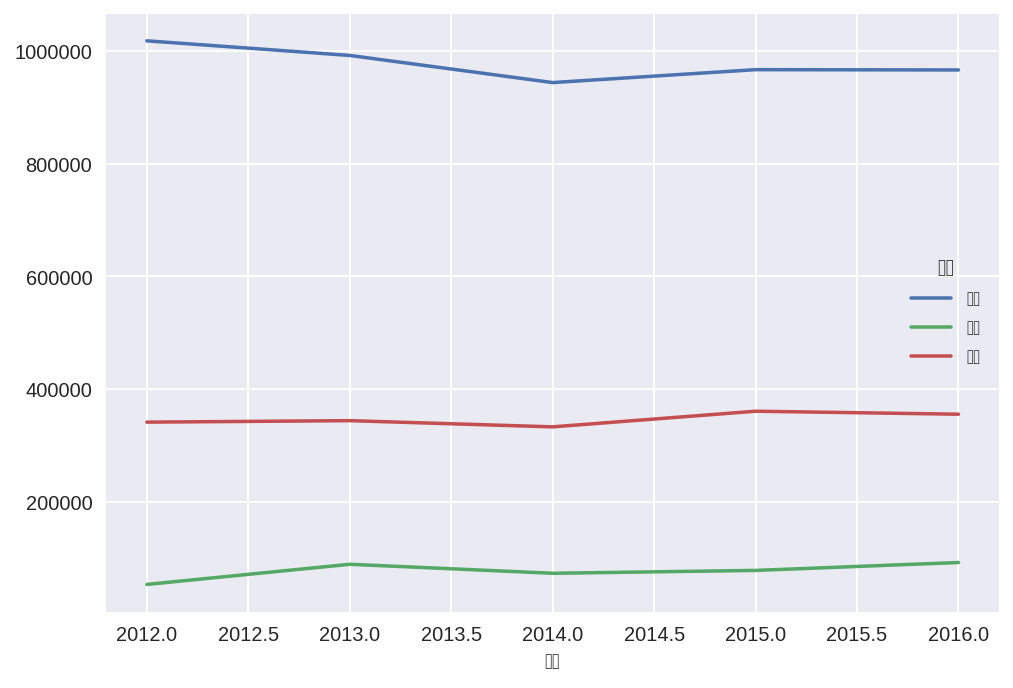

In [50]:
pivot_tbl = pd.pivot_table(df, values='명', index=['연도'], columns='젠더', aggfunc=np.sum)
pivot_tbl.plot()

- 성별 피해자/가해자 수의 추이는 다음과 같습니다. 

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:431: UserWarning: position_stack : Removed 192 rows containing missing values.
  data = self.position.setup_data(self.data, params)


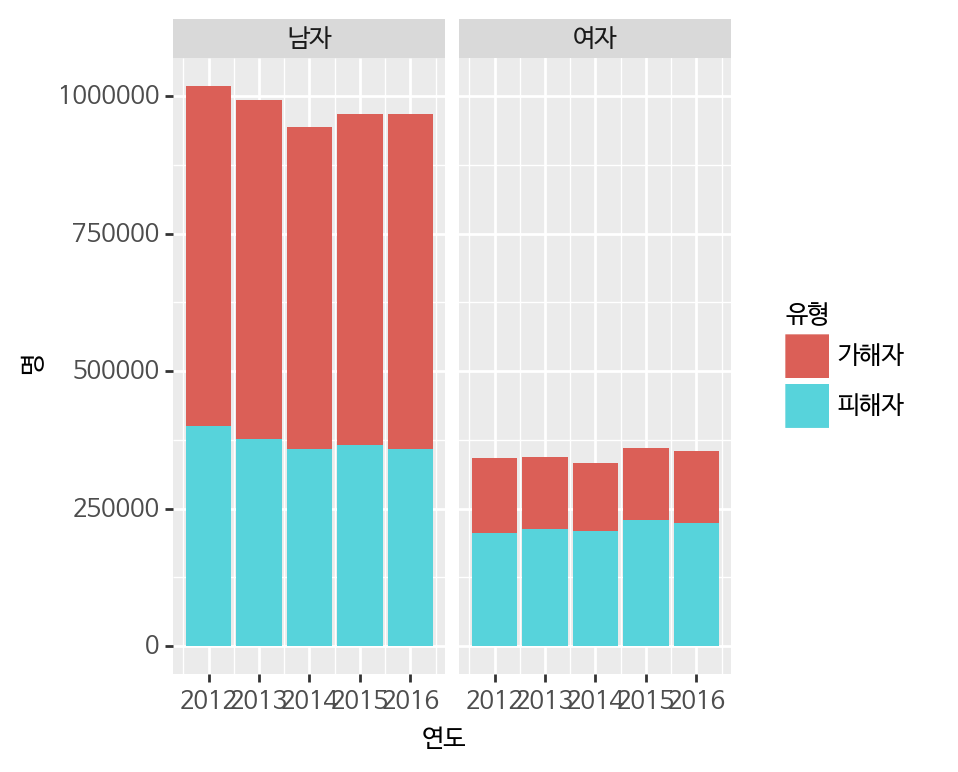

<ggplot: (8784333694819)>

In [112]:
df2 = df.loc[df['젠더'] != '불상']
pivot_tbl = pd.pivot_table(df2, values='명', index=['연도'], columns=['젠더', '유형'], aggfunc=np.sum)

(ggplot(data=df2)
 + geom_col(mapping=aes(fill='유형', x='연도', y='명'))
 + theme(text=element_text(fontproperties=font))
 + facet_wrap('젠더')
)


#### 범죄 유형별 발생 추이


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


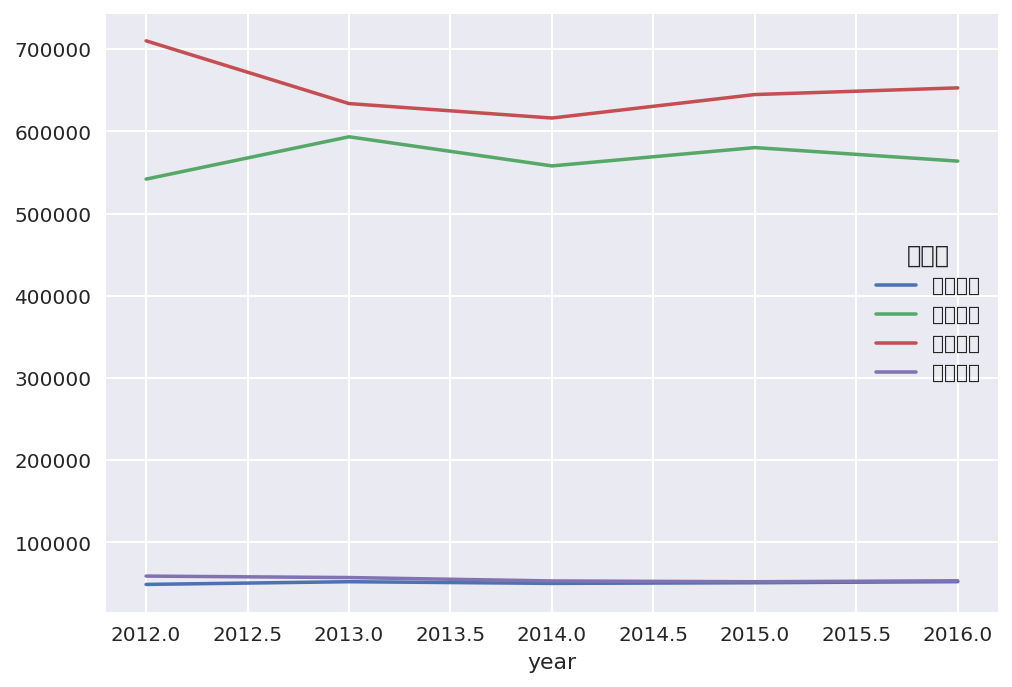

In [216]:
pivot_tbl = pd.pivot_table(df, values='num of criminal', index=['year'], columns='대분류', aggfunc=np.sum)
pivot_tbl.plot()

## 범죄 유형별 특징
2012-2016년까지 발생한 범죄 유형별 비율은 아래와 같습니다 (원형으로 바꿔보자)

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:431: UserWarning: position_stack : Removed 200 rows containing missing values.
  data = self.position.setup_data(self.data, params)


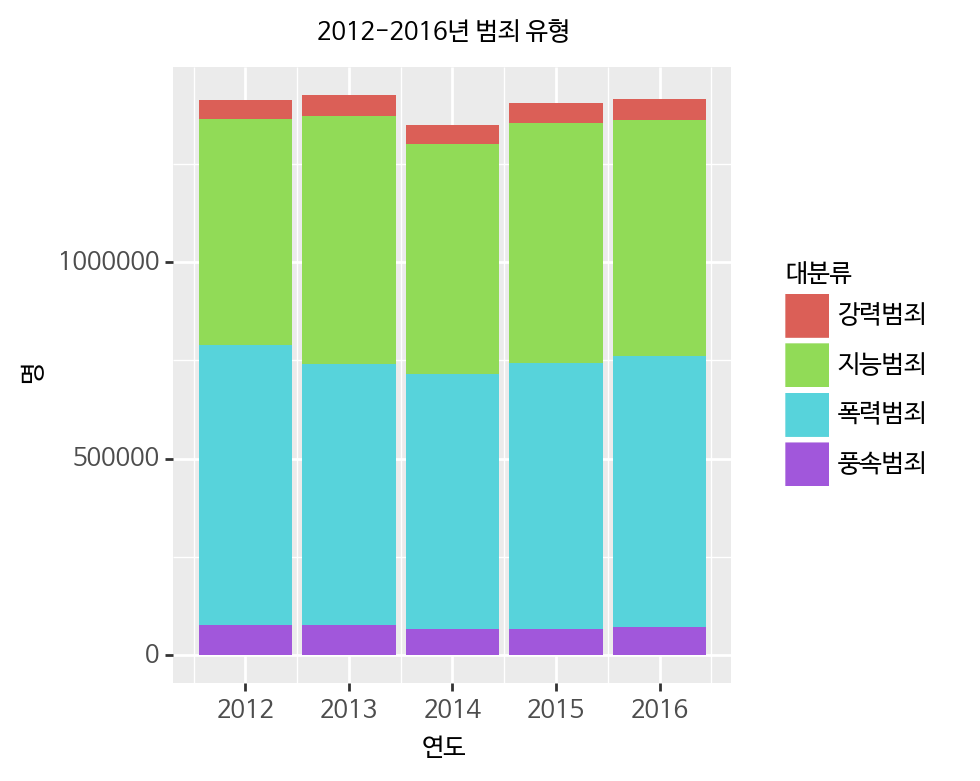

<ggplot: (8784334627034)>

In [54]:
mpl.rc('font', family=font_name)
(
    ggplot(data=df)
    +labs(title='2012-2016년 범죄 유형')
    +geom_col(mapping=aes(fill='대분류', x='연도', y='명'))
    +theme(text=element_text(fontproperties=font))
)

#### 남/녀 범죄 유형 (각각) 

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:431: UserWarning: position_stack : Removed 200 rows containing missing values.
  data = self.position.setup_data(self.data, params)


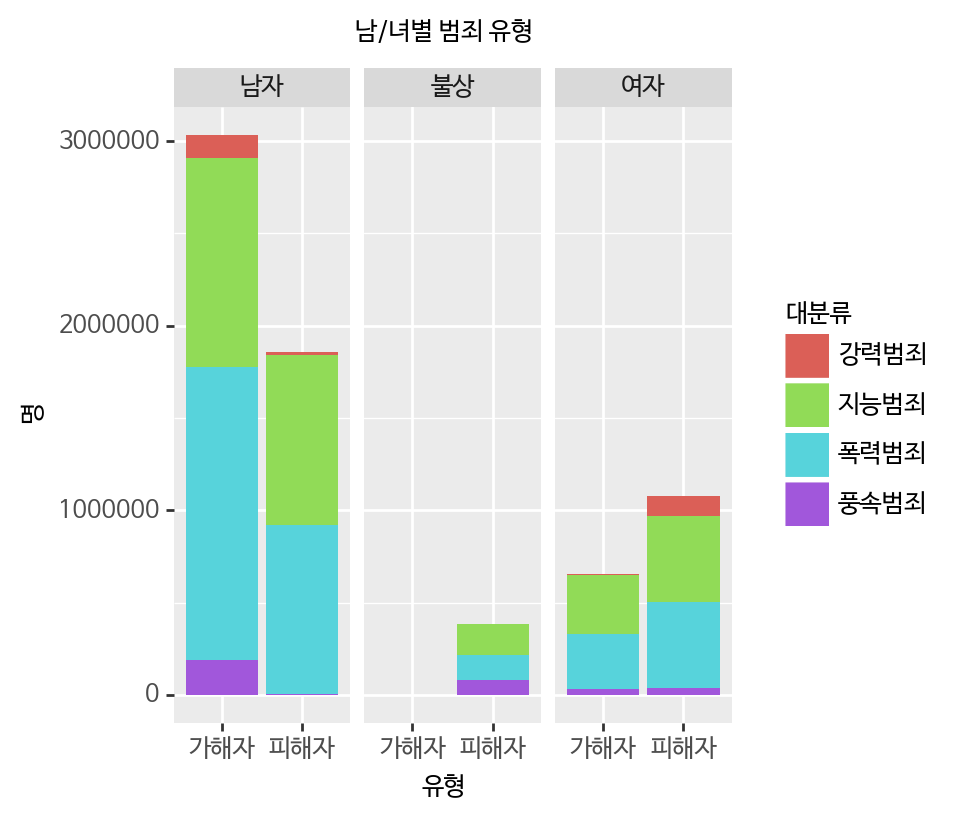

<ggplot: (-9223363252520206613)>

In [56]:
(
    ggplot(data=df)
    +labs(title='남/녀별 범죄 유형')
    +geom_col(mapping=aes(fill='대분류', x='유형', y='명'))
    +theme(text=element_text(fontproperties=font))
    +facet_wrap('젠더')
)

#### 연령별 범죄 유형

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd4393d6c50>],
      dtype=object)

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


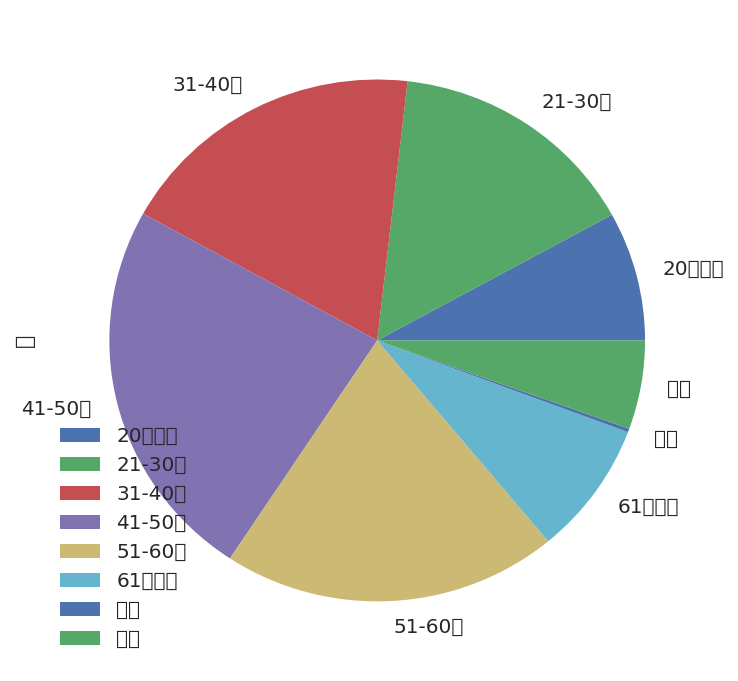

In [57]:
pivot_tbl = pd.pivot_table(df, values='명', index='연령대', aggfunc=np.sum)
pivot_tbl.plot.pie(figsize=(6,6), subplots=True)

## 종합 

#### 가장 범죄를 많이 저지르는 연령/성 ?
--> 40대 남자입니다

,,명
연령대,젠더,
61세이상,남자,426864.0
21-30세,남자,764992.0
31-40세,남자,992875.0
51-60세,남자,1055338.0
41-50세,남자,1251405.0


/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


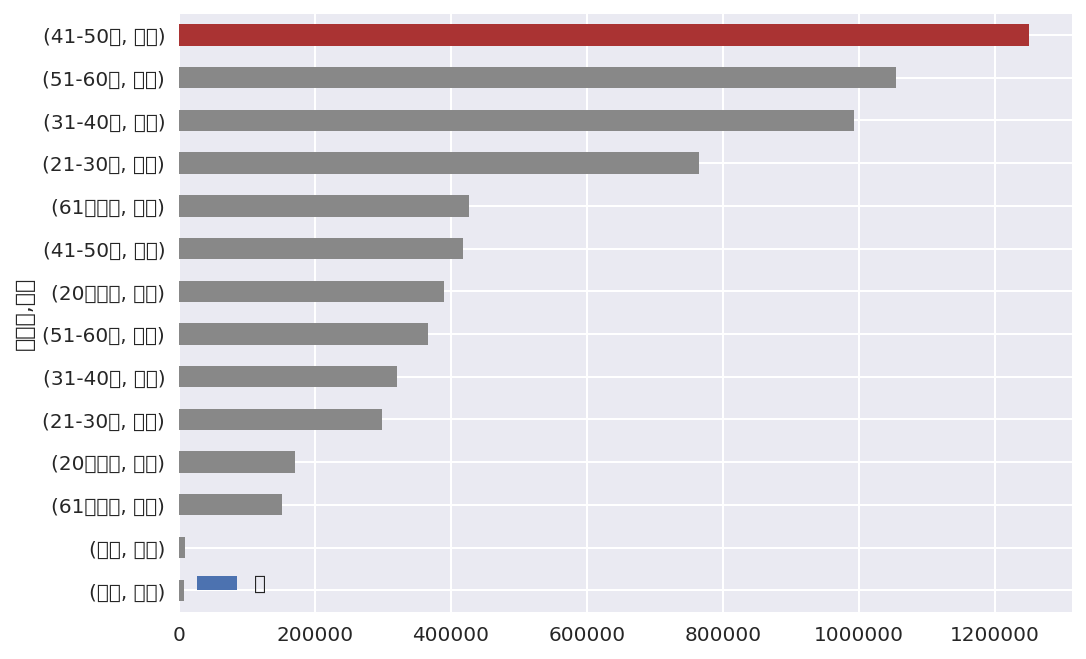

In [94]:
df3 = df.loc[df['유형'] == '가해자']
df3 = df.loc[df['젠더'] != '미상']
df3 = df.loc[df['젠더'] != '불상']
df3 = df.loc[df['연령대'] != '미상']
df3 = df.loc[df['연령대'] != '불상']

pivot_table = pd.pivot_table(df3, index = ['연령대', '젠더'], values='명', aggfunc=np.sum)
sorted_table = pivot_table.sort_values(by='명', ascending=True)
ax = sorted_table.plot(kind='barh')

for bar in ax.patches:
  bar.set_facecolor('#888888')
ax.patches[len(pivot_table)-1].set_facecolor('#aa3333')

sorted_table.tail()

#### 가장 범죄에 취약한 연령/성?
--> 역시 40대 남자네요. 

남자의 40대에는 대체 무슨일이 생기는 것일까요? 

 '아프지도 못하는 마흔'이라 더니..

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


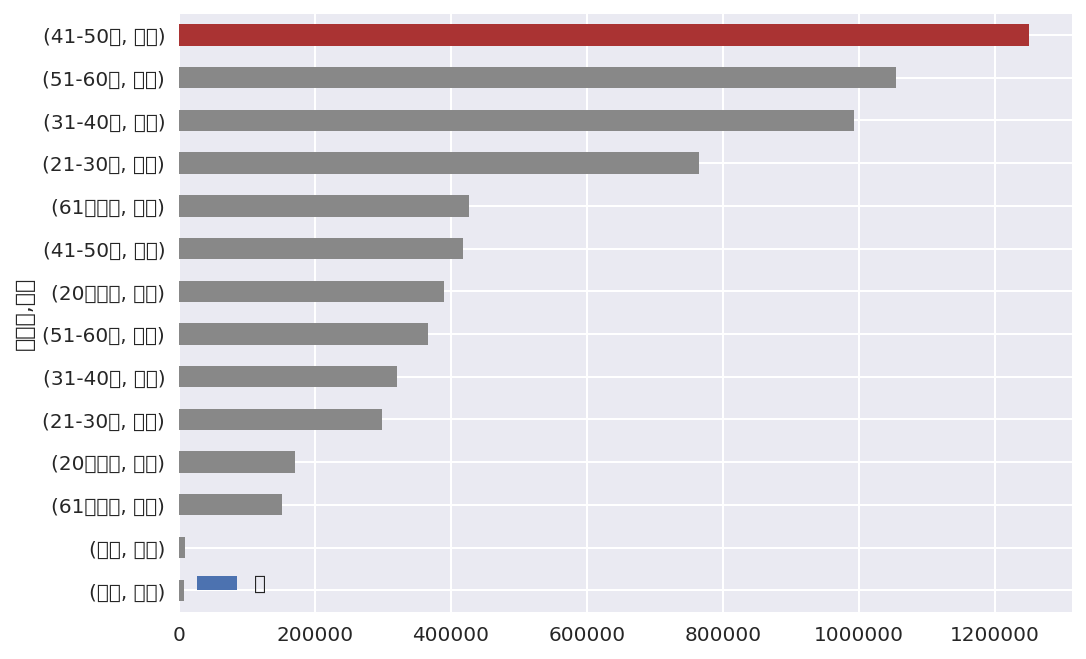

In [100]:
df4 = df.loc[df['유형'] == '피해자']
df4 = df.loc[df['젠더'] != '미상']
df4 = df.loc[df['젠더'] != '불상']
df4 = df.loc[df['연령대'] != '미상']
df4 = df.loc[df['연령대'] != '불상']

pivot_table = pd.pivot_table(df4, index = ['연령대', '젠더'], values='명', aggfunc=np.sum)
sorted_table = pivot_table.sort_values(by='명', ascending=True)
ax = sorted_table.plot(kind='barh')
for bar in ax.patches:
  bar.set_facecolor('#888888')
ax.patches[len(pivot_table)-1].set_facecolor('#aa3333')


#### 30대 여성이 피해 당하기 쉬운 범죄는?
--> 30대에 진입한 제가 당하기 쉬운 범죄는 무엇일까요?

--> 강력범죄일거라고 예상했는데

--> 의외로 폭력범죄와 지능범죄에 취약하군요!

In [81]:
df4 = df.loc[df['유형'] == '피해자']
df4 = df.loc[df['젠더'] == '여자']
df4 = df.loc[df['연령대'] == '21-30세']

pivot_table = pd.pivot_table(df4, index = ['대분류'], values='명', aggfunc=np.sum)
sorted_table = pivot_table.sort_values(by='명', ascending=False)
sorted_table

,명
대분류,
폭력범죄,535423.0
지능범죄,410507.0
강력범죄,63859.0
풍속범죄,54364.0


구체적으로 어떤 폭력에 저와 같은 30대 여성들이 노출되는지를 더 자세히 살펴볼게요

In [88]:
pivot_table = pd.pivot_table(df4, index = ['대분류', '소분류'], values='명', aggfunc=np.sum)
sorted_table = pivot_table.sort_values(by='명', ascending=False)
sorted_table.head()

명
대분류  소분류            
지능범죄 사기    2268875.0
폭력범죄 폭행    1530588.0
     상해     600872.0
     폭력행위   548019.0
     손괴     445149.0

세부적으로 보면 '사기'가 1위이지만

폭행은 우발적으로, 상해는 고의적으로 상대방에게 상해를 입히는 범죄이고 상습적이고 2인 이상의 흉기를 든 폭행이 폭력이라니

남에게 위해를 입는 '폭력범죄'를 1위로 봐도 무방하겠습니다. 길가다 맞지 않도록 주의해야 겠어요 ㅜㅜ

그렇다면 사기와 폭력범죄를 가장 많이 저지르는 연령대/성별은 누구일까요??

In [98]:
df4 = df.loc[df['유형'] == '가해자']
df4 = df.loc[df['대분류'] == '폭력범죄']

pivot_table = pd.pivot_table(df4, index = ['젠더', '연령대'], values='명', aggfunc=np.sum)
sorted_table = pivot_table.sort_values(by='명', ascending=False)
sorted_table.head()

명
젠더 연령대             
남자 41-50세  615637.0
   51-60세  518741.0
   31-40세  492407.0
   21-30세  414847.0
   20세이하   245315.0

모든 범죄 1위인 40대 남성이 역시 1위이군용

40-50대 남성에게 맞지 않도록 조심 ㅜㅜ

그렇다면 사기는 어떨까요?

In [99]:
df4 = df.loc[df['유형'] == '가해자']
df4 = df.loc[df['소분류'] == '사기']

pivot_table = pd.pivot_table(df4, index = ['젠더', '연령대'], values='명', aggfunc=np.sum)
sorted_table = pivot_table.sort_values(by='명', ascending=False)
sorted_table.head()

명
젠더 연령대             
남자 41-50세  444008.0
   51-60세  364058.0
   31-40세  353378.0
   21-30세  241248.0
여자 41-50세  161833.0

아아.. 대한민국 40대 남성에게 대체 무슨 일이 있는 것인가요... 40대 아저씨가 솔깃한 제안을 하면 의심해야 하는 것일까요 ㅜㅜ